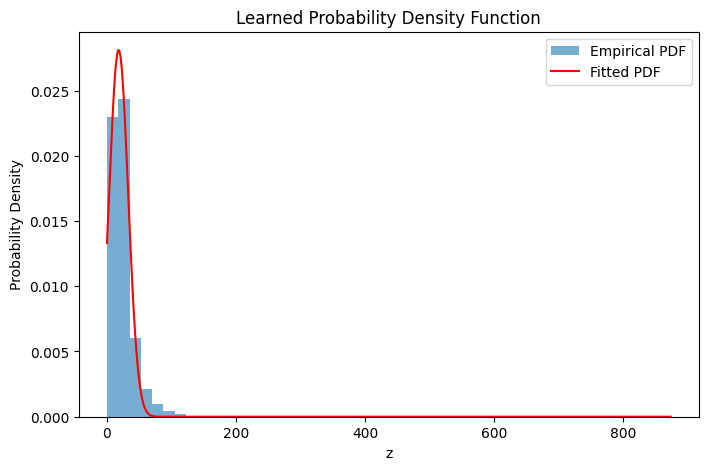

In [5]:
# =========================
# IMPORTS
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv("data.csv", encoding="latin1", low_memory=False)


no2_col = [col for col in df.columns if "NO2" in col.upper()][0]
x = df[no2_col].dropna().values


#parameters given
r = 102317185
ar = 0.5 * (r % 7)
br = 0.3 * ((r % 5) + 1)


def transform(x, ar, br):
    return x + ar * np.sin(br * x)

z = transform(x, ar, br)

# PD

def pdf(z, c, lam, mu):
    exponent = -lam * (z - mu) ** 2
    exponent = np.clip(exponent, -700, 700)
    return c * np.exp(exponent)


hist, bin_edges = np.histogram(z, bins=50, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [1.0, 0.01, np.mean(z)]
c_hat, lambda_hat, mu_hat = curve_fit(pdf, bin_centers, hist, p0=initial_guess)[0]

z_range = np.linspace(z.min(), z.max(), 500)
pdf_fit = pdf(z_range, c_hat, lambda_hat, mu_hat)

plt.figure(figsize=(8, 5))
plt.hist(z, bins=50, density=True, alpha=0.6, label="Empirical PDF")
plt.plot(z_range, pdf_fit, 'r', label="Fitted PDF")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.title("Learned Probability Density Function")
plt.legend()
plt.show()
